<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Resources" data-toc-modified-id="Resources-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Resources</a></span></li><li><span><a href="#Depth" data-toc-modified-id="Depth-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Depth</a></span></li><li><span><a href="#Magnitude-Over-TIme" data-toc-modified-id="Magnitude-Over-TIme-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Magnitude Over TIme</a></span></li><li><span><a href="#Depth-of-Recent-Quakes" data-toc-modified-id="Depth-of-Recent-Quakes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Depth of Recent Quakes</a></span></li><li><span><a href="#Magnitude-of-Recent-Quakes" data-toc-modified-id="Magnitude-of-Recent-Quakes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Magnitude of Recent Quakes</a></span></li><li><span><a href="#Location-of-Recent-Quakes" data-toc-modified-id="Location-of-Recent-Quakes-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Location of Recent Quakes</a></span></li><li><span><a href="#Prepare-3-D-Plots-(lat,-long,-time)" data-toc-modified-id="Prepare-3-D-Plots-(lat,-long,-time)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Prepare 3-D Plots (lat, long, time)</a></span></li><li><span><a href="#Fracking-data" data-toc-modified-id="Fracking-data-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Fracking data</a></span></li><li><span><a href="#Create-Overlaid-Scatter-Plots" data-toc-modified-id="Create-Overlaid-Scatter-Plots-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Create Overlaid Scatter Plots</a></span><ul class="toc-item"><li><span><a href="#History" data-toc-modified-id="History-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>History</a></span></li><li><span><a href="#Recent-Quakes-Only" data-toc-modified-id="Recent-Quakes-Only-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Recent Quakes Only</a></span></li></ul></li></ul></div>

## Resources
https://www.forbes.comsitesjamesconca20160907the-connection-between-earthquakes-and-fracking#13e0e3ff6d68

http://news.nationalgeographic.comnews201403140310-earthquakes-usgs-california-faults-science https://en.wikipedia.orgwikiSeismic_wave 

In [1]:
# Imports

import os
import math

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import mpl_toolkits #conda install -c conda-forge basemap
import seaborn as sns

import import_ipynb  # pip install import-ipynb
import utils

from utils import haversine, linear_dist_sphere, reset_pd_display

importing Jupyter notebook from utils.ipynb


In [2]:
# Display options
%matplotlib inline
reset_pd_display(max_rows=None, max_cols=100)

pd.set_option('max_rows', None)

In [3]:
# Data can be obtained via the GUI at:
#https://earthquake.usgs.gov/earthquakes/search/

#... or with the REST API with a command like:
'''
https://earthquake.usgs.gov/earthquakes/map/
    ?extent=-25.16517,-199.86328&
    extent=70.72898,5.625&
    range=search&
    showUSFaults=true&
    timeZone=utc&
    search=%7B%22name%22:%22Search%20Results%22,
        %22params%22:%7B
        %22starttime%22:%221900-01-01%2000:00:00%22,
        %22endtime%22:%222021-07-31%2023:59:59%22,
        %22maxlatitude%22:37.02,
        %22minlatitude%22:33.615,
        %22maxlongitude%22:-94.131,
        %22minlongitude%22:-100.107,
        %22minmagnitude%22:2.5,
        %22eventtype%22:%22earthquake%22,
        %22orderby%22:
'''

'\nhttps://earthquake.usgs.gov/earthquakes/map/\n    ?extent=-25.16517,-199.86328&\n    extent=70.72898,5.625&\n    range=search&\n    showUSFaults=true&\n    timeZone=utc&\n    search=%7B%22name%22:%22Search%20Results%22,\n        %22params%22:%7B\n        %22starttime%22:%221900-01-01%2000:00:00%22,\n        %22endtime%22:%222021-07-31%2023:59:59%22,\n        %22maxlatitude%22:37.02,\n        %22minlatitude%22:33.615,\n        %22maxlongitude%22:-94.131,\n        %22minlongitude%22:-100.107,\n        %22minmagnitude%22:2.5,\n        %22eventtype%22:%22earthquake%22,\n        %22orderby%22:\n'

In [4]:
# This data was downloaded via the GUI

datafile = 'usgs.oklahoma.1900.2021.query.csv'
path = 'data'
filename = os.path.join('.', path, datafile)

# Read it in
usecols = ['time', 'latitude', 'longitude', 'depth', 'mag', 'place' ]
edf = pd.read_csv(filename, usecols=usecols, parse_dates=True)

# Clean it up
edf.rename({'longitude': 'long', 'latitude': 'lat'}, axis=1, inplace=True)

edf.index = pd.to_datetime(edf["time"])

edf['day'] = edf.index.day
edf['month'] = edf.index.month
edf['year'] = edf.index.year

edf.drop('time', axis=1, inplace=True)
print(f"rows:  {len(edf)}")
edf.head(3)

edf['type']='quake'

rows:  9384


In [5]:
edf.reset_index(inplace=True)

## Depth

Earthquake depth estimates have been available since 1950.

<AxesSubplot:xlabel='time', ylabel='depth'>

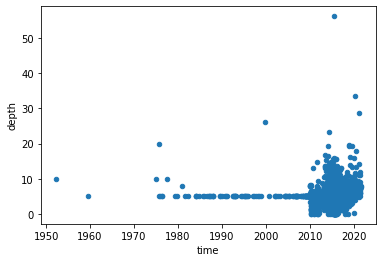

In [6]:
minyr = 1900
edf[edf['year']>=minyr].plot.scatter(x='time', y='depth')

## Magnitude Over TIme

<AxesSubplot:xlabel='time', ylabel='mag'>

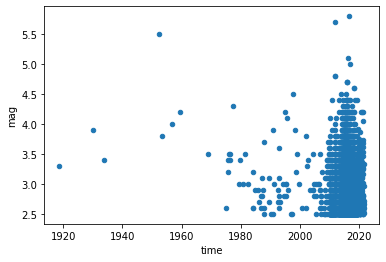

In [7]:
minyr = 1900
edf[edf['year']>=minyr].plot.scatter(x='time', y='mag')

## Depth of Recent Quakes

<AxesSubplot:xlabel='time', ylabel='depth'>

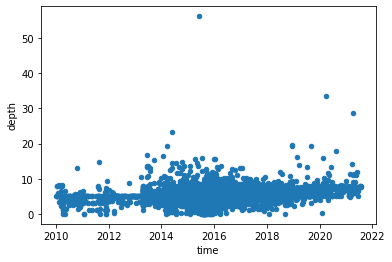

In [8]:
minyr = 2010
edf[edf['year']>=minyr].plot.scatter(x='time', y='depth')

## Magnitude of Recent Quakes

<AxesSubplot:xlabel='mag', ylabel='depth'>

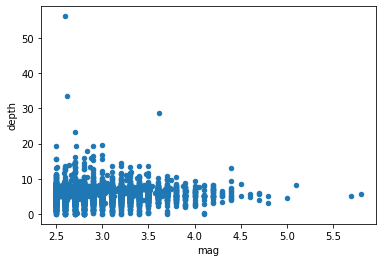

In [9]:
edf[edf['year']>=minyr].plot.scatter(x='mag', y='depth')

## Location of Recent Quakes

<AxesSubplot:xlabel='long', ylabel='lat'>

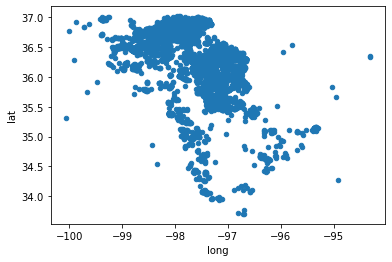

In [10]:
edf[edf['year']>=minyr].plot.scatter(y='lat', x='long')

## Frequency of Earthquakes


In [39]:
edf.head(1)

,time,lat,long,depth,mag,place,day,month,year,type,days_since_1900
0,2021-07-22 09:23:17.010000+00:00,35.121833,-95.34,7.55,3.34,"2 km E of Quinton, Oklahoma",22,7,2021,quake,44397


In [13]:
# Move 'time out of the index'
if 'time' not in edf.columns:
    edf.reset_index(inplace=True)

## Prepare 3-D Plots (lat, long, time)

In [14]:
from datetime import datetime
import pytz
edf['time_since_1900'] = (edf['time'] - datetime(1900, 1, 1, 1, 1, 1,1, pytz.UTC))
edf['days_since_1900'] = edf['time_since_1900'].dt.days
edf.drop(['time_since_1900'], axis=1, inplace=True)
edf.head(1)

,time,lat,long,depth,mag,place,day,month,year,type,time_since_1900,days_since_1900
0,2021-07-22 09:23:17.010000+00:00,35.121833,-95.34,7.55,3.34,"2 km E of Quinton, Oklahoma",22,7,2021,quake,44397 days 08:22:16.009999,44397


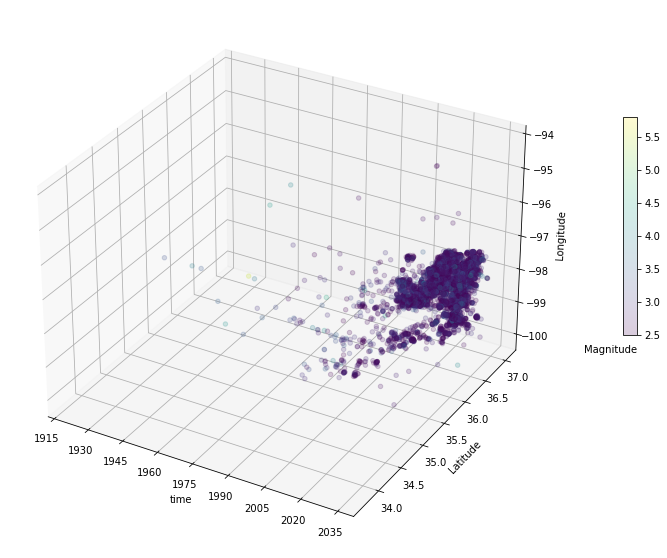

In [38]:
import warnings
warnings.filterwarnings('ignore')

minyr = 1900
fig = plt.figure(figsize = (10,10))

ax = fig.add_subplot(projection='3d')

ax.set_xlabel("time")
ax.set_ylabel("Latitude")
ax.set_zlabel("Longitude")

my_plot = ax.scatter(edf['days_since_1900'], edf['lat'], edf['long'], c=edf['mag'], alpha=.2, label='earthquakes')

# Set a colorbar
cax = fig.add_axes([ax.get_position().x1  +0.1,  # -> right
                    ax.get_position().y0  +.3,   # -> up or down
                    0.02,
                    ax.get_position().height *.4 # height
                   ])

cax.set_xlabel('Magnitude', loc='right', labelpad=10)
plt.colorbar(my_plot, cax=cax)

# Create sensible labels for time axis
fig.canvas.draw()
default_labels = [item.get_text() for item in ax.get_xticklabels()]
first_axis_year = int(minyr + int(default_labels[0])/365)
last_axis_year =  int(int( default_labels[-1] ) /365 ) + first_axis_year
this_yr = datetime.now().year
year_gap = int( int((last_axis_year - first_axis_year)) / (len(default_labels)-2))
new_labels = [str(yr) for yr in range(first_axis_year, last_axis_year + year_gap, year_gap)]
_ = ax.set_xticklabels(new_labels)

## Fracking data

In [17]:
import os
import pandas as pd
from numpy import nan

# Ingest data on fracking for Oklahoma
#  https://www.fractracker.org/map/us/oklahoma/

fn = 'OK_ClassII_InjectionWells.csv'
fpath = os.path.join('.', 'data', fn)
print(fpath)  
df = pd.read_csv(fpath)

.\data\OK_ClassII_InjectionWells.csv


In [18]:
df.drop(['COUNTY_COD', 'SECTION', 'TOWNSHIP', 'RANGE', 'LEASE_NAME', 'WELL_NUMBE', 'OPERATOR_', 'OPERATOR'],
       axis=1,
       inplace=True)

In [19]:
df.replace('.', nan, inplace=True)
df.head()

,STATUS,MAXPRESSUR,MAXRATE,LATTITUDE,LONGITUDE
0,AC,300,300,36.989739,-102.5956
1,AC,NaN,NaN,36.966192,-102.5798
2,AC,1000,3000,36.966192,-102.5798
3,AC,1000,3000,36.966192,-102.5798
4,AC,700,800,36.963473,-102.5764


In [20]:
df.rename({'LATTITUDE':'lat', 'LONGITUDE': 'long' }, axis=1, inplace=True)
df.head(1)

,STATUS,MAXPRESSUR,MAXRATE,lat,long
0,AC,300,300,36.989739,-102.5956


In [21]:

edf.head(1)

,time,lat,long,depth,mag,place,day,month,year,type,days_since_1900
0,2021-07-22 09:23:17.010000+00:00,35.121833,-95.34,7.55,3.34,"2 km E of Quinton, Oklahoma",22,7,2021,quake,44397


##  Create Overlaid Scatter Plots

### History

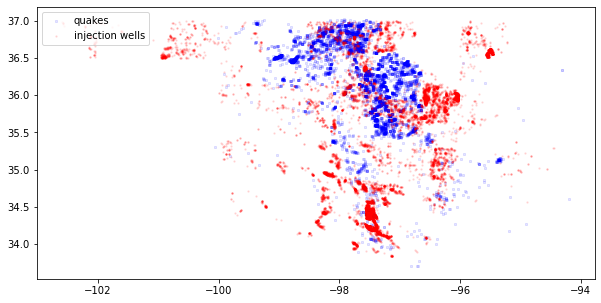

In [28]:
# Overlay earthquake and fracking data
fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(111)

ax1.scatter(y=edf['lat'], x=edf['long'], s=2, c='b', marker="s", label='quakes', alpha=.1)
ax1.scatter(y=df['lat'], x=df['long'], s=2, c='r', marker="o", label='injection wells', alpha=.1)
plt.legend(loc='upper left');

### Recent Quakes Only

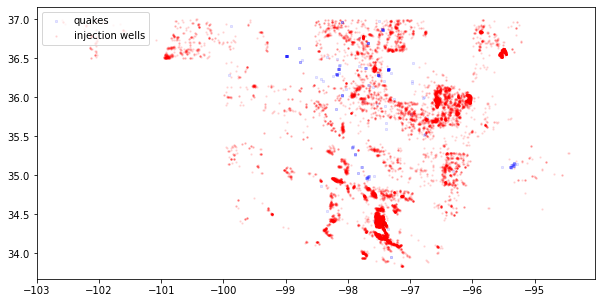

In [30]:
edf_recent = edf[edf['year']>=2020]

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(111)

ax1.scatter(y=edf_recent['lat'], x=edf_recent['long'], s=5, c='b', marker="s", label='quakes', alpha=.1)
ax1.scatter(y=df['lat'], x=df['long'], s=2, c='r', marker="o", label='injection wells', alpha=.1)
plt.legend(loc='upper left');

## Export these dataframes
We'll save these dataframes in compressed (pickle) files for use as the basis for exploration of GIS tools.


In [25]:
file_path = os.path.join ('.', 'data', 'earthquakes.pkl')
edf.to_pickle(file_path)

file_path = os.path.join ('.', 'data', 'fracking.pkl')
df.to_pickle(file_path)

## Time Series Analysis

In [43]:
edf.set_index('time', inplace=True)

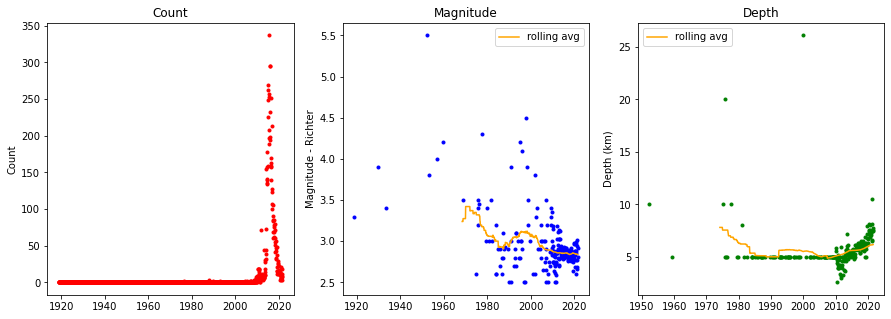

In [112]:
first_yr = 1900

fig, (ax1, ax2, ax3) = plt.subplots(1,3, gridspec_kw={'width_ratios': [3, 3, 3]})
fig.set_size_inches(15, 5)
# Counts
ax1.plot(edf[edf.year >= first_yr].mag.resample('M').count(), marker='.', linestyle=' ', linewidth=.5, 
         color='r')

ax1.set_ylabel('Count')
ax1.set_title('Count')


# Magnitude
ax2.plot(edf[edf.year >= first_yr].mag.resample('M').mean(), marker='.', linestyle=' ', 
         color='b')
ax2.plot(edf[edf.year >= first_yr].mag.resample('M').mean().rolling(window=180, min_periods=5, center=True).mean(), 
         label='rolling avg', color='orange', )
ax2.set_ylabel('Magnitude - Richter')
ax2.set_title('Magnitude')
ax2.legend()

# Depth
ax3.plot(edf[edf.year >= first_yr].depth.resample('M').mean(), marker='.', linestyle=' ', linewidth=.5, 
         color='g')
ax3.plot(edf[edf.year >= first_yr].depth.resample('M').mean().rolling(window=180, min_periods=10, center=True).mean(), 
         label='rolling avg', color='orange', )
ax3.set_ylabel('Depth (km)')
ax3.set_title('Depth')
ax3.legend()

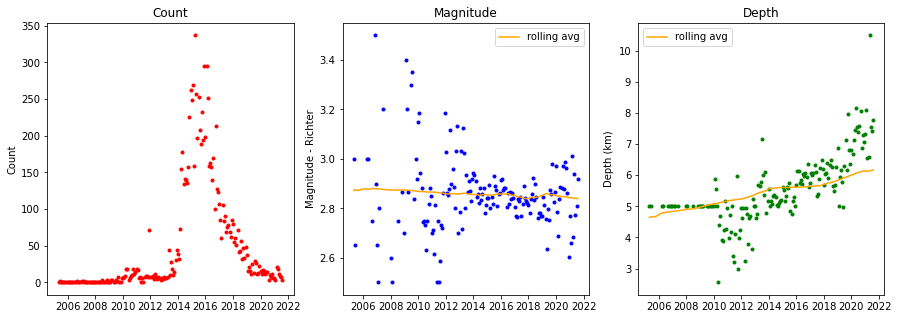

In [113]:
first_yr = 2005

fig, (ax1, ax2, ax3) = plt.subplots(1,3, gridspec_kw={'width_ratios': [3, 3, 3]})
fig.set_size_inches(15, 5)
# Counts
ax1.plot(edf[edf.year >= first_yr].mag.resample('M').count(), marker='.', linestyle=' ', linewidth=.5, 
         color='r')

ax1.set_ylabel('Count')
ax1.set_title('Count')


# Magnitude
ax2.plot(edf[edf.year >= first_yr].mag.resample('M').mean(), marker='.', linestyle=' ', 
         color='b')
ax2.plot(edf[edf.year >= first_yr].mag.resample('M').mean().rolling(window=180, min_periods=5, center=True).mean(), 
         label='rolling avg', color='orange', )
ax2.set_ylabel('Magnitude - Richter')
ax2.set_title('Magnitude')
ax2.legend()

# Depth
ax3.plot(edf[edf.year >= first_yr].depth.resample('M').mean(), marker='.', linestyle=' ', linewidth=.5, 
         color='g')
ax3.plot(edf[edf.year >= first_yr].depth.resample('M').mean().rolling(window=180, min_periods=10, center=True).mean(), 
         label='rolling avg', color='orange', )
ax3.set_ylabel('Depth (km)')
ax3.set_title('Depth')
ax3.legend()

In [105]:
x = edf[edf.year>=2005]
len(x)

9311

AttributeError: 'DataFrame' object has no attribute 'year'

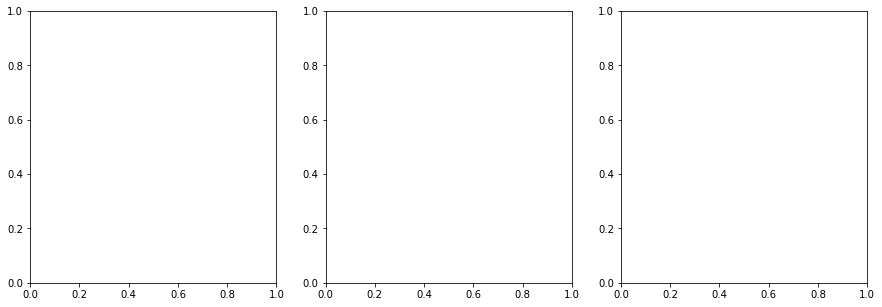

In [114]:
first_yr = 2005

fig, (ax1, ax2, ax3) = plt.subplots(1,3, gridspec_kw={'width_ratios': [3, 3, 3]})
fig.set_size_inches(15, 5)
# Counts
ax1.plot(df[df.year >= first_yr].year.resample('M').count(), marker='.', linestyle=' ', linewidth=.5, 
         color='r')

ax1.set_ylabel('Count')
ax1.set_title('Count')
